### Part 1 Diabetes

In [1]:
from scipy.io import arff
import pandas as pd
from GAN import GAN
from GAN_Twist import GAN_RF
from Dataset import Dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Diabetes

In [2]:
scaler = StandardScaler()

data = arff.loadarff('Assignment 4 files/diabetes.arff')
df = pd.DataFrame(data[0])
to_norm = df.columns.values[:-1]
original_df = df.copy()
df['class'] = df['class'].apply(lambda x: x.decode("utf-8"))
df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes
class_col = df['class']
df = df.drop(columns=['class'], axis=1)
scaler = MinMaxScaler()
scaler.fit(df.values)
df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
df = pd.concat([df, class_col],axis=1)
df

preg      plas      pres      skin      insu      mass      pedi  \
0    0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
4    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
763  0.588235  0.507538  0.622951  0.484848  0.212766  0.490313  0.039710   
764  0.117647  0.613065  0.573770  0.272727  0.000000  0.548435  0.111870   
765  0.294118  0.608040  0.590164  0.232323  0.132388  0.390462  0.071307   
766  0.058824  0.633166  0.491803  0.000000  0.000000  0.448584  0.115713   
767  0.058824  0.467337  0.573770  0.313131  0.000000  0.453055  0.101196   

          age  class  
0    0.483333      1  
1    0.166667      0  
2    0.183333      1  
3    0.000000      0  
4    0.200000      1  
..        ...    ...  
763  0.700000      0  
764  0.100000      0  
765  0.150000      0  
766  0.433333      1  
767  0.033333      0  

[768 rows x 9 columns]

In [3]:
#Define the GAN and training parameters
noise_dim = 5
dim = 10
batch_size = 32

log_step = 100
epochs = 5001
learning_rate = 5e-4
models_dir = 'model_diabetes'

print(df.shape[1])

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = ['', epochs, log_step]

model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
history = synthesizer.train(df, train_args)

9
0 [D loss: 0.697637, acc.: 31.25%] [G loss: 0.686412]
generated_data
100 [D loss: 0.655165, acc.: 70.31%] [G loss: 0.798848]
generated_data
200 [D loss: 0.705769, acc.: 45.31%] [G loss: 0.689664]
generated_data
300 [D loss: 0.684051, acc.: 65.62%] [G loss: 0.702930]
generated_data
400 [D loss: 0.689031, acc.: 40.62%] [G loss: 0.710433]
generated_data
500 [D loss: 0.705985, acc.: 42.19%] [G loss: 0.716129]
generated_data
600 [D loss: 0.686639, acc.: 51.56%] [G loss: 0.682494]
generated_data
700 [D loss: 0.681307, acc.: 59.38%] [G loss: 0.751082]
generated_data
800 [D loss: 0.693013, acc.: 51.56%] [G loss: 0.682729]
generated_data
900 [D loss: 0.685917, acc.: 59.38%] [G loss: 0.683095]
generated_data
1000 [D loss: 0.701653, acc.: 40.62%] [G loss: 0.736613]
generated_data
1100 [D loss: 0.686821, acc.: 54.69%] [G loss: 0.700873]
generated_data
1200 [D loss: 0.690693, acc.: 59.38%] [G loss: 0.736002]
generated_data
1300 [D loss: 0.694862, acc.: 45.31%] [G loss: 0.712221]
generated_data
14

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(history['D_loss'], label='Discriminator Loss')
ax.plot(history['G_loss'], label='Generator Loss')
ax.set_xlabel('Epoch')
plt.legend()
plt.show()

In [5]:
from sklearn.decomposition import PCA

In [6]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [7]:
X_embedded

array([[ 0.7069937 ,  0.15312978],
       [-0.40271091, -0.0881876 ],
       [ 0.68963127,  0.10496044],
       ...,
       [-0.34377156,  0.07261042],
       [ 0.62311372, -0.0179499 ],
       [-0.40738638, -0.17497506]])

In [8]:
len(df)

768

In [9]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 100 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [10]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

In [11]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 400, 500, 1000, 2000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict(z)
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [12]:
fooled_samples = scaler.inverse_transform(g_z[:,:-1])
generated_df = pd.DataFrame(fooled_samples)
generated_df['8'] = g_z[:,-1]
generated_df.columns = original_df.columns
generated_df['discriminator'] = synthesizer.discriminator.predict(g_z)
generated_df['discriminator'] = generated_df['discriminator'].apply(lambda v: 1 if v > 0.5 else 0)
generated_df = generated_df.round()
generated_df[generated_df < 0] = 0
generated_df

preg   plas   pres  skin   insu  mass  pedi   age  class  discriminator
0    6.0   89.0   61.0  12.0    0.0  28.0   1.0  69.0    0.0              1
1    4.0  165.0   82.0  22.0  198.0  30.0   1.0  36.0    1.0              1
2    3.0  204.0  100.0  25.0  212.0  37.0   1.0  37.0    1.0              1
3    0.0   91.0   57.0  23.0   34.0  28.0   1.0  28.0   -0.0              0
4    0.0   91.0   57.0  19.0   33.0  27.0   1.0  28.0   -0.0              0
..   ...    ...    ...   ...    ...   ...   ...   ...    ...            ...
95   5.0  137.0   69.0  17.0  190.0  23.0   1.0  38.0    1.0              1
96   5.0   97.0   60.0   4.0   53.0  29.0   1.0  56.0   -0.0              0
97   7.0  137.0   71.0  14.0  213.0  21.0   1.0  49.0    1.0              1
98   4.0  187.0   92.0  24.0  218.0  33.0   1.0  40.0    1.0              1
99   1.0   88.0   13.0  12.0  147.0  27.0   2.0  26.0   -0.0              0

[100 rows x 10 columns]

In [13]:
g_z[:,:-1].shape

(100, 8)

In [14]:
class_col = generated_df['class']
tmp = generated_df.drop(columns=['class' ,'discriminator'], axis=1)
tmp = pd.DataFrame(g_z[:,:-1], columns=df.columns[:-1])
tmp = pd.concat([tmp, class_col],axis=1)
tmp

preg      plas      pres      skin      insu      mass      pedi  \
0   0.371319  0.447850  0.501530  0.120860 -0.018746  0.418359  0.426710   
1   0.222875  0.829938  0.675406  0.217797  0.233587  0.444642  0.359592   
2   0.203478  1.026981  0.823374  0.254343  0.250442  0.555878  0.427843   
3  -0.062955  0.457864  0.465309  0.233557  0.040565  0.415265  0.288318   
4  -0.043917  0.456105  0.463325  0.190572  0.039274  0.404332  0.274907   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.310282  0.686742  0.562020  0.168570  0.224658  0.341664  0.346879   
96  0.308201  0.486072  0.494753  0.042617  0.062101  0.427593  0.348319   
97  0.396060  0.690154  0.581368  0.144089  0.251616  0.315642  0.362364   
98  0.241621  0.939707  0.755918  0.245250  0.257793  0.484951  0.391136   
99  0.032424  0.443195  0.106950  0.120696  0.173269  0.397305  0.673074   

         age  class  
0   0.804940    0.0  
1   0.244053    1.0  
2   0.269804    1.0  
3   0.118461   -0.0  
4   0.109679   -0.0  
..       ...    ...  
95  0.277787    1.0  
96  0.581616   -0.0  
97  0.462954    1.0  
98  0.317455    1.0  
99  0.081062   -0.0  

[100 rows x 9 columns]

In [15]:
pca = PCA(n_components=2, svd_solver='full')
original_emb = pca.fit_transform(df)
generated_positive_emb = pca.transform(tmp[tmp['class'].eq(1)])
generated_negative_emb = pca.transform(tmp[tmp['class'].eq(0)])
original_positive_emb = original_emb[df[df['class'].eq(1)].index.values]
original_negative_emb = original_emb[df[df['class'].eq(0)].index.values]
failed = pca.transform(tmp.iloc[generated_df[generated_df['discriminator'].eq(0)].index])

In [16]:
generated_df['discriminator'].value_counts()

0    71
1    29
Name: discriminator, dtype: int64

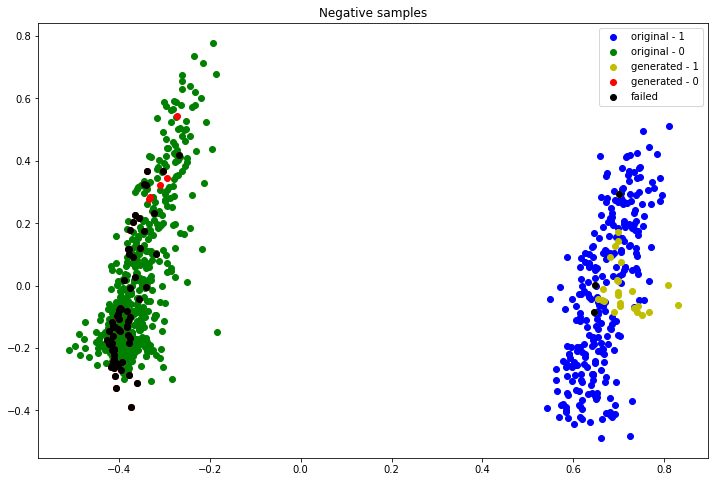

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Negative samples')
ax.scatter(original_positive_emb[:,0], original_positive_emb[:,1],label='original - 1', c='b')
ax.scatter(original_negative_emb[:,0], original_negative_emb[:,1],label='original - 0', c='g')

ax.scatter(generated_positive_emb[:,0], generated_positive_emb[:,1],label='generated - 1', c='y')
ax.scatter(generated_negative_emb[:,0], generated_negative_emb[:,1],label='generated - 0', c='r')
ax.scatter(failed[:,0], failed[:,1],label='failed', c='black')
plt.legend()
plt.show()

In [18]:
generated_df['discriminator'].value_counts()

0    71
1    29
Name: discriminator, dtype: int64

In [19]:
tmp_generated = generated_df[generated_df['discriminator'].eq(1)]
tmp_generated = tmp_generated[tmp_generated['class'].eq(0)]
tmp_generated = tmp_generated.drop(columns=['discriminator', 'class'], axis=1)
tmp_generated

preg   plas  pres  skin  insu  mass  pedi   age
0    6.0   89.0  61.0  12.0   0.0  28.0   1.0  69.0
63   3.0   94.0  64.0   9.0   0.0  25.0   1.0  54.0
85   4.0  100.0  64.0  13.0  22.0  27.0   1.0  55.0
87   5.0  107.0  65.0  16.0  53.0  28.0   1.0  56.0
93   4.0   86.0  61.0  10.0   0.0  26.0   1.0  53.0

In [20]:
tmp_original = original_df
tmp_original = tmp_original[tmp_original['class'].eq(b'tested_negative')]
tmp_original = tmp_original.drop(columns=['class'], axis=1)
tmp_original

preg   plas  pres  skin   insu  mass   pedi   age
1     1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0
3     1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0
5     5.0  116.0  74.0   0.0    0.0  25.6  0.201  30.0
7    10.0  115.0   0.0   0.0    0.0  35.3  0.134  29.0
10    4.0  110.0  92.0   0.0    0.0  37.6  0.191  30.0
..    ...    ...   ...   ...    ...   ...    ...   ...
762   9.0   89.0  62.0   0.0    0.0  22.5  0.142  33.0
763  10.0  101.0  76.0  48.0  180.0  32.9  0.171  63.0
764   2.0  122.0  70.0  27.0    0.0  36.8  0.340  27.0
765   5.0  121.0  72.0  23.0  112.0  26.2  0.245  30.0
767   1.0   93.0  70.0  31.0    0.0  30.4  0.315  23.0

[500 rows x 8 columns]

In [21]:
from sklearn.metrics.pairwise import euclidean_distances

In [22]:
euclidean_distances(X=tmp_original, Y=tmp_original).mean()

114.76525755980178

In [23]:
generated_distances = euclidean_distances(X=tmp_generated, Y=tmp_original)
print(f'distances shape: {generated_distances.shape}')
generated_distances.mean()

distances shape: (5, 500)


93.9661063079947

In [24]:
df

preg      plas      pres      skin      insu      mass      pedi  \
0    0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
4    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
763  0.588235  0.507538  0.622951  0.484848  0.212766  0.490313  0.039710   
764  0.117647  0.613065  0.573770  0.272727  0.000000  0.548435  0.111870   
765  0.294118  0.608040  0.590164  0.232323  0.132388  0.390462  0.071307   
766  0.058824  0.633166  0.491803  0.000000  0.000000  0.448584  0.115713   
767  0.058824  0.467337  0.573770  0.313131  0.000000  0.453055  0.101196   

          age  class  
0    0.483333      1  
1    0.166667      0  
2    0.183333      1  
3    0.000000      0  
4    0.200000      1  
..        ...    ...  
763  0.700000      0  
764  0.100000      0  
765  0.150000      0  
766  0.433333      1  
767  0.033333      0  

[768 rows x 9 columns]

In [25]:
columns = df.columns[:-1]

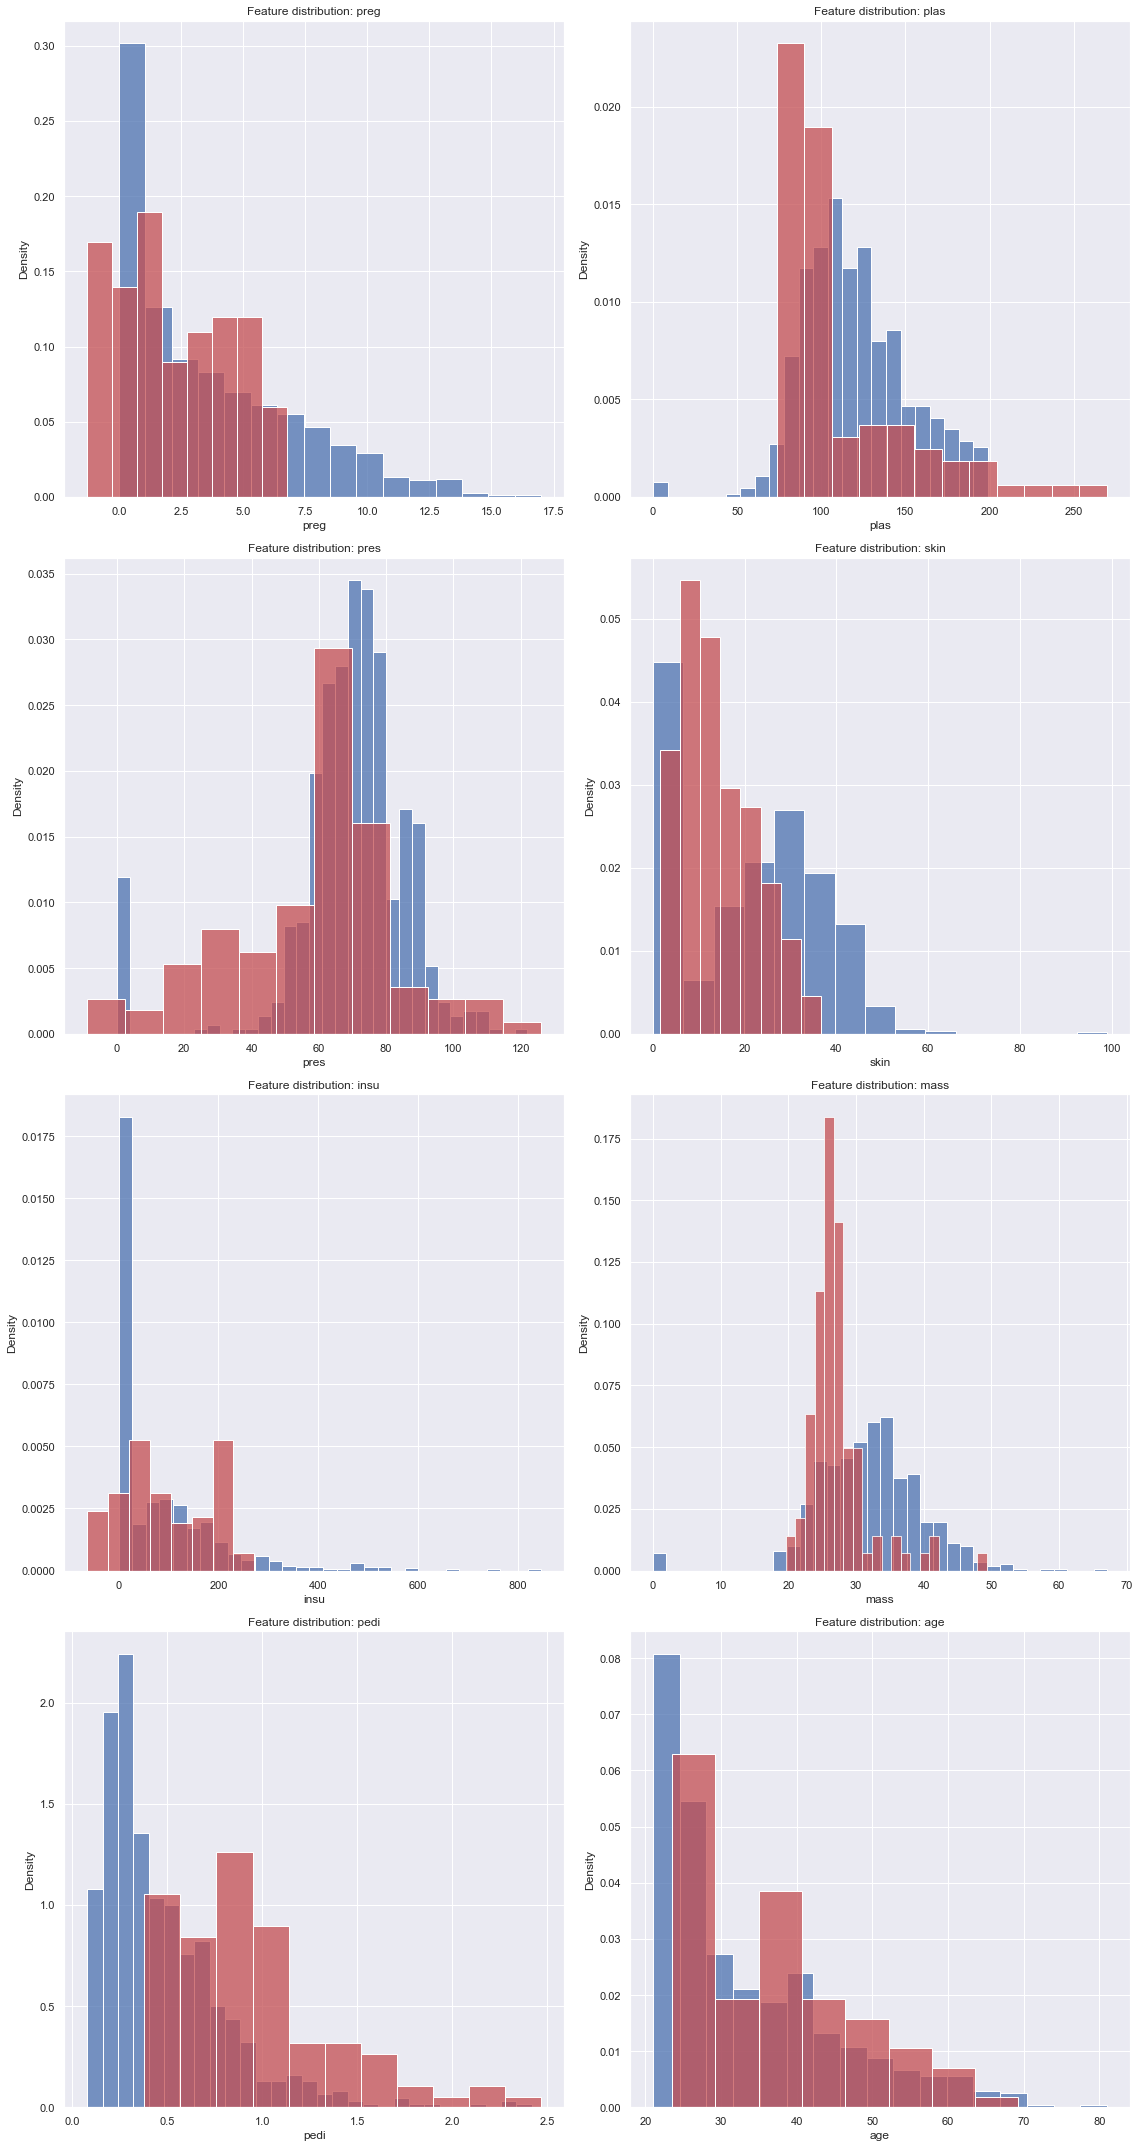

In [26]:
import seaborn as sns, numpy as np

sns.set_theme(); np.random.seed(0)

def plot_feature_dist(df, gen):
    fig, ax = plt.subplots(int(np.ceil(df.shape[1]/2)), 2, figsize=(16, 30))
    for i in range(len(columns)):
        column = columns.values[i]
        ax[i // 2, i % 2].set_title(f'Feature distribution: {column}')
        sns.histplot(df[column], label='Original', stat='density', ax=ax[i // 2, i % 2], color='b')
        sns.histplot(gen[column], label='Generated', stat='density', ax=ax[i // 2, i % 2], color='r')
    fig.tight_layout()
    plt.savefig('diabetes.png')
plot_feature_dist(pd.DataFrame(scaler.inverse_transform(df.values[:, :-1]), columns=columns), pd.DataFrame(scaler.inverse_transform(g_z[:, :-1]), columns=columns))

In [27]:
scaler.inverse_transform(df.values[:, :-1])

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])